In [1]:
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
base_general = pd.read_excel(r'Bases BW/General_diciembre.xlsx')
base_racismo = pd.read_excel(r'Bases BW/Racismo_diciembre.xlsx')

In [3]:
df = pd.merge(base_general, base_racismo, how='left')
df.fillna(0, inplace= True )
df['% Odio'] = df['Racismo']/df['General']
df['Splitted'] = df.Region.str.split(',')
df['Region'] = df.Splitted.str[0].str.strip()
df.drop('Splitted', inplace=True, axis=1)
df

,Region,General,Racismo,% Odio
0,Mexico City,864,331.0,0.383102
1,Nuevo León,127,61.0,0.480315
2,Jalisco,119,43.0,0.361345
3,México,61,27.0,0.442623
4,Puebla,61,24.0,0.393443
5,Guanajuato,57,26.0,0.456140
6,Baja California,45,18.0,0.400000
7,Sonora,35,13.0,0.371429
8,Veracruz,35,10.0,0.285714
9,Querétaro,32,14.0,0.437500


In [4]:
df.to_excel('Base_estados_mexicanos_completa.xlsx')
df.to_csv('Base_estados_mexicanos_completa.csv')

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
from io import StringIO
base_graficas = pd.read_csv("Base_estados_mexicanos_completa.csv")
base_graficas.rename({'Count_negativo_y':'Count_negativo'}, inplace = True, axis = 1 )
base_graficas.sort_values("Racismo", inplace=True, ascending=False)
base_graficas['Total_Nacional'] = base_graficas['General'].sum()
base_graficas['Participación % Nacional'] = base_graficas['General']/base_graficas['Total_Nacional']
base_graficas.to_excel("Base_grafica_barras.xlsx")
base_graficas

,Unnamed: 0,Region,General,Racismo,% Odio,Total_Nacional,Participación % Nacional
0,0,Mexico City,864,331.0,0.383102,1758,0.491468
1,1,Nuevo León,127,61.0,0.480315,1758,0.072241
2,2,Jalisco,119,43.0,0.361345,1758,0.067691
3,3,México,61,27.0,0.442623,1758,0.034699
5,5,Guanajuato,57,26.0,0.456140,1758,0.032423
4,4,Puebla,61,24.0,0.393443,1758,0.034699
6,6,Baja California,45,18.0,0.400000,1758,0.025597
11,11,Chihuahua,30,14.0,0.466667,1758,0.017065
9,9,Querétaro,32,14.0,0.437500,1758,0.018203
7,7,Sonora,35,13.0,0.371429,1758,0.019909


In [6]:
base_graficas = base_graficas[0:5]
#base_graficas.drop(columns = ["Estado_copia"], inplace=True)
base_graficas

,Unnamed: 0,Region,General,Racismo,% Odio,Total_Nacional,Participación % Nacional
0,0,Mexico City,864,331.0,0.383102,1758,0.491468
1,1,Nuevo León,127,61.0,0.480315,1758,0.072241
2,2,Jalisco,119,43.0,0.361345,1758,0.067691
3,3,México,61,27.0,0.442623,1758,0.034699
5,5,Guanajuato,57,26.0,0.456140,1758,0.032423


In [7]:
base_graficas.columns

Index(['Unnamed: 0', 'Region', 'General', 'Racismo', '% Odio',
       'Total_Nacional', 'Participación % Nacional'],
      dtype='object')

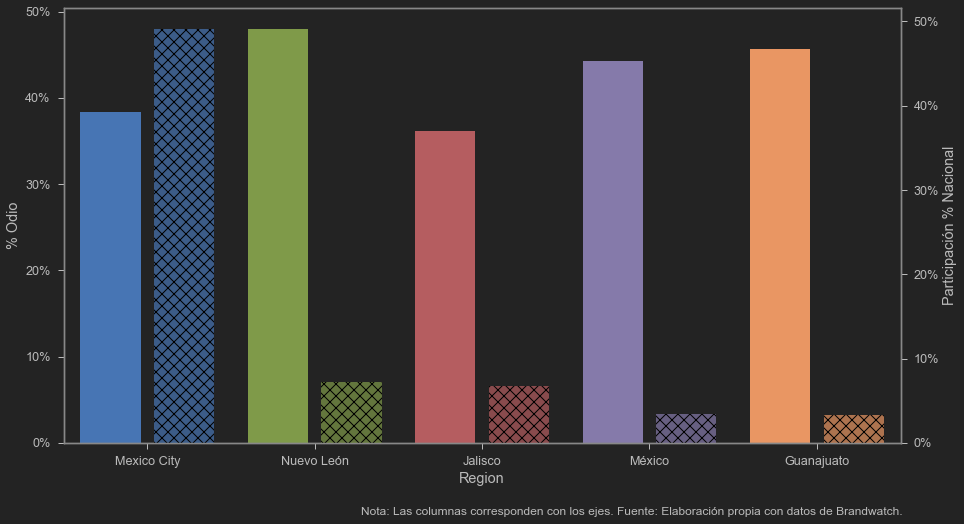

In [8]:
x_ = base_graficas.columns[1]
y_ = base_graficas.columns[4]
y_2 = base_graficas.columns[6]
data1 = base_graficas[[x_, y_]]
data2 = base_graficas[[x_, y_2]]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=x_,y=y_,data=data1)
width_scale = 0.45
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.figure.text(0.4, 0,'Nota: Las columnas corresponden con los ejes. Fuente: Elaboración propia con datos de Brandwatch.', fontsize=12)
ax.grid(False)
ax2 = ax.twinx()
sns.barplot(x=x_,y=y_2,data=data2,alpha=0.7,hatch='xx',ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1 - width_scale))
    bar.set_width(w *  width_scale)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.grid(False)
plt.savefig("out.png") 
plt.show()